In [2]:
import re
from xcube_cmems.store import CmemsDataStore
import os

In [14]:
import os
os.environ["COPERNICUSMARINE_SERVICE_USERNAME"] =""
os.environ["COPERNICUSMARINE_SERVICE_PASSWORD"] =""

In [15]:
cmems_store =  CmemsDataStore()

---
## Study Area

In [57]:
time_range = ("2022-08-03", "2022-08-17")
time_range = ("2023-06-07", "2023-06-17")
bbox = (-10,41,12,60)

## Access Datasets

In [58]:
data_id = "cmems_mod_nws_bgc-chl_my_7km-3D_P1D-m"  # Only up to 13°E

In [59]:
cmems_store.describe_data(data_id)

INFO - 2025-12-01T10:01:25Z - Selected dataset version: "202012"
INFO - 2025-12-01T10:01:25Z - Selected dataset part: "default"
/home/conda/users/30f6ffd2-1762860680-159-deepesdl-xcube-1.12.0/lib/python3.13/site-packages/xcube/core/store/descriptor.py:247: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self.dims = dict(dims) if dims else None


In [60]:
ds = cmems_store.open_data(data_id,time_range=time_range, bbox = bbox)
ds

INFO - 2025-12-01T10:01:27Z - Selected dataset version: "202012"
INFO - 2025-12-01T10:01:27Z - Selected dataset part: "default"


<xarray.Dataset> Size: 60MB
Dimensions:    (depth: 24, latitude: 285, longitude: 198, time: 11)
Coordinates:
  * depth      (depth) float32 96B 0.0 3.0 10.0 15.0 ... 2e+03 3e+03 4e+03 5e+03
  * latitude   (latitude) float32 1kB 41.0 41.07 41.13 41.2 ... 59.8 59.87 59.93
  * longitude  (longitude) float32 792B -9.889 -9.778 -9.667 ... 11.89 12.0
  * time       (time) datetime64[ns] 88B 2023-06-07 2023-06-08 ... 2023-06-17
Data variables:
    chl        (time, depth, latitude, longitude) float32 60MB dask.array<chunksize=(8, 20, 285, 198), meta=np.ndarray>
Attributes:
    credit:       E.U. Copernicus Marine Service Information (CMEMS)
    contact:      servicedesk.cmems@mercator-ocean.eu
    source:       AMM-FOAM 7 km (tidal) NEMO v3.6_FABM-ERSEM v15.06_NEMOVAR v6
    history:      See source and creation_date attributes
    Conventions:  CF-1.7
    title:        daily-mean chlorophyll concentration (3D)
    institution:  UK Met Office
    references:   http://marine.copernicus.eu/

In [61]:
ds = ds.sel(depth=0)
ds

<xarray.Dataset> Size: 2MB
Dimensions:    (latitude: 285, longitude: 198, time: 11)
Coordinates:
  * latitude   (latitude) float32 1kB 41.0 41.07 41.13 41.2 ... 59.8 59.87 59.93
  * longitude  (longitude) float32 792B -9.889 -9.778 -9.667 ... 11.89 12.0
  * time       (time) datetime64[ns] 88B 2023-06-07 2023-06-08 ... 2023-06-17
    depth      float32 4B 0.0
Data variables:
    chl        (time, latitude, longitude) float32 2MB dask.array<chunksize=(8, 285, 198), meta=np.ndarray>
Attributes:
    credit:       E.U. Copernicus Marine Service Information (CMEMS)
    contact:      servicedesk.cmems@mercator-ocean.eu
    source:       AMM-FOAM 7 km (tidal) NEMO v3.6_FABM-ERSEM v15.06_NEMOVAR v6
    history:      See source and creation_date attributes
    Conventions:  CF-1.7
    title:        daily-mean chlorophyll concentration (3D)
    institution:  UK Met Office
    references:   http://marine.copernicus.eu/

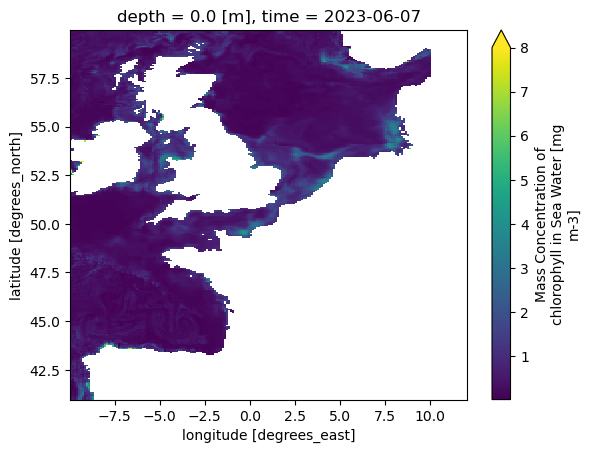

In [62]:
#ds.sel(time="2022-08-10", depth=0, method="nearest").chl.plot.imshow(vmax=8)
ds.sel(time="2022-08-10", method="nearest").chl.plot.imshow(vmax=8)

In [20]:
data_id_2 = "cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D"
cmems_store.describe_data(data_id_2)

INFO - 2025-12-01T09:11:54Z - Selected dataset version: "202311"
INFO - 2025-12-01T09:11:54Z - Selected dataset part: "default"
/home/conda/users/30f6ffd2-1762860680-159-deepesdl-xcube-1.12.0/lib/python3.13/site-packages/xcube/core/store/descriptor.py:247: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self.dims = dict(dims) if dims else None


In [21]:
ds2 = cmems_store.open_data(data_id_2, time_range=time_range, bbox=bbox)
ds2

INFO - 2025-12-01T09:11:57Z - Selected dataset version: "202311"
INFO - 2025-12-01T09:11:57Z - Selected dataset part: "default"


<xarray.Dataset> Size: 67MB
Dimensions:          (time: 15, latitude: 480, longitude: 720)
Coordinates:
  * time             (time) datetime64[ns] 120B 2022-08-03 ... 2022-08-17
  * latitude         (latitude) float32 2kB 40.02 40.06 40.1 ... 59.94 59.98
  * longitude        (longitude) float32 3kB -9.979 -9.937 ... 19.94 19.98
Data variables:
    CHL              (time, latitude, longitude) float32 21MB dask.array<chunksize=(10, 480, 720), meta=np.ndarray>
    CHL_uncertainty  (time, latitude, longitude) float64 41MB dask.array<chunksize=(10, 480, 720), meta=np.ndarray>
    flags            (time, latitude, longitude) int8 5MB dask.array<chunksize=(10, 480, 720), meta=np.ndarray>
Attributes:
    contact:      servicedesk.cmems@acri-st.fr
    source:       surface observation
    comment:      average
    history:      Created using software developed at ACRI-ST
    Conventions:  CF-1.8, ACDD-1.3
    title:        cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D
    institution:  ACRI
    references:   http://www.globcolour.info GlobColour has been originally f...

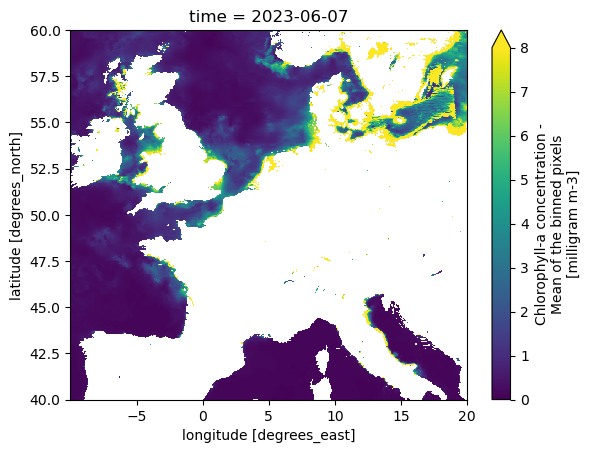

In [16]:
ds2.CHL.sel(time="2022-08-10", method="nearest").\
    plot.imshow(vmin=0, vmax=8)

---
## Write Data to Team Storage to persist it

In [22]:
S3_USER_STORAGE_KEY = os.environ["S3_USER_STORAGE_KEY"]
S3_USER_STORAGE_SECRET = os.environ["S3_USER_STORAGE_SECRET"]
S3_USER_STORAGE_BUCKET = os.environ["S3_USER_STORAGE_BUCKET"]

In [23]:
from xcube.core.store import new_data_store
team_store = new_data_store("s3", 
                       root=S3_USER_STORAGE_BUCKET, 
                       storage_options=dict(anon=False, 
                                            key=S3_USER_STORAGE_KEY, 
                                            secret=S3_USER_STORAGE_SECRET))

list(team_store.get_data_ids())

In [63]:
#team_store.write_data(ds,'cmems_7km_2023060717.zarr', replace=True)
#team_store.write_data(ds2,'cmems_4km_2022080317.zarr', replace=False)

'cmems_7km_2023060717.zarr'

In [30]:
ds_1 = team_store.open_data("cmems_4km_2023060717.zarr")
ds_2 = team_store.open_data("cmems_7km_2023060717.zarr")

---

In [ ]:
#team_store.delete_data("cmems_4km.zarr")